In [97]:
import pandas as pd
import numpy as np
import os
import requests
from datetime import datetime, timedelta
from datetime import date
import holidays
import holidays_es
from holidays_es.holidays import get_provinces, Province
from holidays import Spain
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from prophet import Prophet

In [21]:

# Set the path of the parent directory
parent_dir = 'C:/Users/germa/github/rest_in_bcn_extras/control'

# Initialize an empty DataFrame
la_lluna_01 = pd.DataFrame()

# Loop over the year folders
for year_folder in os.listdir(parent_dir):
    year_path = os.path.join(parent_dir, year_folder)
    
    # Loop over the month folders
    for month_folder in os.listdir(year_path):
        month_path = os.path.join(year_path, month_folder)
        
        # Get the month from the name of the folder
        month = month_folder[:3]
        
        # Convert month to month number
        if month.startswith('EN'):
            month_num = 1
        elif month.startswith('FE'):
            month_num = 2
        elif month.startswith('MAR'):
            month_num = 3
        elif month.startswith('AB'):
            month_num = 4
        elif month.startswith('MAY'):
            month_num = 5
        elif month.startswith('JUN'):
            month_num = 6
        elif month.startswith('JUL'):
            month_num = 7
        elif month.startswith('AG'):
            month_num = 8
        elif month.startswith('SE'):
            month_num = 9
        elif month.startswith('OC'):
            month_num = 10
        elif month.startswith('NO'):
            month_num = 11
        elif month.startswith('D'):
            month_num = 12
        else:
            month_num = None
        
        # Loop over the Excel files
        for file in os.listdir(month_path):
            
            # Check if the file starts with 'REC'
            if file.startswith('REC'):
                file_path = os.path.join(month_path, file)
                
                # Read the Excel file
                df = pd.read_excel(file_path, header=None)
                
                # Get the day of the month and daily revenue
                day_of_month = df.iloc[2:8, [1, 3, 5, 7, 9, 11, 13]].stack().reset_index(drop=True)
                daily_revenue = df.iloc[2:8, [2, 4, 6, 8, 10, 12, 14]].stack().reset_index(drop=True)
                
                # Create a DataFrame with day_of_month and daily_revenue
                df_new = pd.DataFrame({'day_of_month': day_of_month, 'daily_revenue': daily_revenue})
                
                # Add the month column as the month number
                df_new['month'] = month_num
                
                # Add the year column
                df_new['year'] = year_folder
                
                # Add the DataFrame to la_lluna_01
                la_lluna_01 = pd.concat([la_lluna_01, df_new], ignore_index=True)
print(la_lluna_01)


     day_of_month daily_revenue  month  year
0               0             0      8  2020
1               0             0      8  2020
2               0             0      8  2020
3               1             0      8  2020
4               2        322.37      8  2020
...           ...           ...    ...   ...
1300            0             0      3  2023
1301            0             0      3  2023
1302            0             0      3  2023
1303            0             0      3  2023
1304            0           NaN      3  2023

[1305 rows x 4 columns]


In [22]:
la_lluna_01.sample(10)

,day_of_month,daily_revenue,month,year
1261,29,0,2,2023
633,25,606.41,5,2021
53,19,886.65,12,2020
1263,0,0,2,2023
1021,12,1524.75,3,2022
785,0,0,4,2022
419,30,0,12,2021
366,10,0,8,2021
569,2,179.73,3,2021
1288,19,0,3,2023


In [23]:
la_lluna_01.to_csv("la_lluna_01.csv", index=False)

In [24]:
la_lluna_01[['year', 'month', 'day_of_month']].applymap(lambda x: x == '').sum()


year            0
month           0
day_of_month    0
dtype: int64

In [25]:
la_lluna_01.dropna(subset=['year', 'month', 'day_of_month'], inplace=True)

In [28]:
la_lluna_01.shape

(1292, 4)

In [29]:
la_lluna_01.head()

,day_of_month,daily_revenue,month,year
0,0,0,8,2020
1,0,0,8,2020
2,0,0,8,2020
3,1,0,8,2020
4,2,322.37,8,2020


In [30]:
la_lluna_01.dtypes


day_of_month     object
daily_revenue    object
month             int64
year             object
dtype: object

In [2]:
la_lluna=pd.read_csv("G:/My Drive/IRONHACK/FINAL PROJECT/la_lluna_01.csv")

In [3]:
la_lluna.shape

(1305, 4)

In [35]:
la_lluna.sample(5)

,day_of_month,daily_revenue,month,year
669,30,0.00,11,2021
1209,10,743.75,1,2023
393,4,1922.40,12,2021
395,6,2513.25,12,2021
611,3,0.00,5,2021


In [36]:
la_lluna.dtypes

day_of_month      object
daily_revenue    float64
month              int64
year               int64
dtype: object

In [37]:

# create a new column with the full date
la_lluna['date'] = la_lluna['day_of_month'].map(str) + '-' + la_lluna['month'].map(str) + '-' + la_lluna['year'].map(str)





In [38]:


def try_parse_date(date_string):
    try:
        return pd.to_datetime(date_string, format='%d-%m-%Y')
    except ValueError:
        return pd.NaT

la_lluna['date'] = la_lluna.apply(lambda row: try_parse_date(f"{row['day_of_month']}-{row['month']}-{row['year']}"), axis=1)



In [39]:
la_lluna.shape

(1305, 5)

In [40]:
# Create 'weekday_str' column with weekday names
la_lluna['weekday_str'] = la_lluna['date'].dt.strftime('%A')

# Create 'weekday' column with weekday numbers (Monday=1, Sunday=7)
la_lluna['weekday'] = la_lluna['date'].dt.dayofweek + 1



In [43]:
la_lluna['weekday'] = la_lluna['weekday'].fillna(0).astype('Int64')


In [45]:
la_lluna.to_csv("la_lluna.csv", index=False)

In [46]:

la_lluna['closed'] = np.where(la_lluna['daily_revenue'] == 0, 1, 0)


In [47]:
la_lluna['closed'] = la_lluna['closed'].fillna(0).astype('Int64')

In [48]:
la_lluna.isna().sum()

day_of_month      13
daily_revenue      7
month              0
year               0
date             204
weekday_str      204
weekday            0
closed             0
dtype: int64

In [49]:
la_lluna['date'].dropna(inplace=True)

In [ ]:
la_lluna = la_lluna['month'].

In [ ]:
la_lluna['day_of_month'] = la_lluna['day_of_month'].astype('Int64')
la_lluna['year'] = la_lluna['year'].astype('Int64')
la_lluna['month'] = la_lluna['month'].astype('Int64')


In [ ]:
la_lluna = la_lluna.loc[~((la_lluna['month'] == 2) & (la_lluna['day_of_month'] > 28) & (la_lluna['year'] != 2020))]


In [4]:
la_lluna = pd.read_csv("la_lluna (1).csv")

In [5]:
la_lluna.dtypes

day_of_month       int64
daily_revenue    float64
month              int64
year               int64
date              object
weekday_str       object
weekday            int64
closed             int64
dtype: object

In [5]:

provinces = get_provinces()
print(provinces)



['alava', 'albacete', 'alicante', 'almeria', 'asturias', 'avila', 'badajoz', 'baleares', 'barcelona', 'bilbao', 'burgos', 'caceres', 'cadiz', 'cantabria', 'castellon', 'ceuta', 'ciudad-real', 'cordoba', 'la-coruna', 'cuenca', 'gijon', 'girona', 'granada', 'guadalajara', 'guipuzcoa', 'huelva', 'huesca', 'jaen', 'leon', 'lleida', 'logrono', 'lugo', 'madrid', 'malaga', 'melilla', 'murcia', 'navarra', 'ourense', 'oviedo', 'palencia', 'palma-de-mallorca', 'las-palmas', 'pamplona', 'pontevedra', 'la-rioja', 'salamanca', 'san-sebastian', 'santander', 'segovia', 'sevilla', 'soria', 'tarragona', 'tenerife', 'teruel', 'toledo', 'valencia', 'valladolid', 'vitoria', 'vizcaya', 'zamora', 'zaragoza']


In [101]:
Province(name="barcelona", year=2022).local_holidays()

[datetime.date(2022, 9, 24), datetime.date(2022, 9, 26)]

In [102]:
Province(name="barcelona", year=2022).regional_holidays()

[datetime.date(2022, 4, 18),
 datetime.date(2022, 6, 6),
 datetime.date(2022, 6, 24),
 datetime.date(2022, 12, 26)]

In [9]:
holidays_list = [(2023, 1, 6),
                (2023, 4, 7),
                (2023, 5, 1),
                (2023, 8, 15),
                (2023, 10, 12),
                (2023, 11, 1),
                (2023, 12, 6),
                (2023, 12, 8),
                (2023, 12, 25),
                (2023, 5, 29), 
                (2023, 9, 25),
                (2023, 4, 10),
                (2023, 6, 24),
                (2023, 9, 11),
                (2023, 12, 26),
                (2020, 1, 1),
                (2020, 1, 6),
                (2020, 4, 10),
                (2020, 5, 1),
                (2020, 8, 15),
                (2020, 10, 12),
                (2020, 12, 8),
                (2020, 12, 25),
                (2020, 6, 1),
                (2020, 9, 24),
                (2020, 4, 13),
                (2020, 6, 24),
                (2020, 9, 11),
                (2020, 12, 26),
                (2021, 1, 1),
                (2021, 1, 6),
                (2021, 4, 2),
                (2021, 5, 1),
                (2021, 10, 12),
                (2021, 11, 1),
                (2021, 12, 6),
                (2021, 12, 8),
                (2021, 12, 25),
                (2021, 5, 24),
                (2021, 9, 24),
                (2021, 4, 5),
                (2021, 6, 24),
                (2021, 9, 11),
                (2022, 1, 1),
                (2022, 1, 6),
                (2022, 4, 15),
                (2022, 8, 15),
                (2022, 10, 12),
                (2022, 11, 1),
                (2022, 12, 6),
                (2022, 12, 8),
                (2022, 9, 24),
                (2022, 9, 26),
                (2022, 4, 18),
                (2022, 6, 6),
                (2022, 6, 24),
                (2022, 12, 26)]

In [10]:


# Convert 'date' column to datetime format
la_lluna['date'] = pd.to_datetime(la_lluna['date'])

# Create new 'holidays' column and set all values to 0
la_lluna['holidays'] = 0

# Loop over every date in the holidays_list and set 'holidays' to 1 for matching dates in 'la_lluna'
for holiday in holidays_list:
    holiday_date = pd.to_datetime('-'.join(map(str, holiday)))
    if holiday_date in la_lluna['date'].values:
        la_lluna.loc[la_lluna['date'] == holiday_date, 'holidays'] = 1
    else:
        # if the holiday is not in the dataframe, you could choose to add a new row with NaN values
        # or ignore the holiday
        print(f"Holiday {holiday_date} not in dataframe")


Holiday 2023-04-07 00:00:00 not in dataframe
Holiday 2023-05-01 00:00:00 not in dataframe
Holiday 2023-08-15 00:00:00 not in dataframe
Holiday 2023-10-12 00:00:00 not in dataframe
Holiday 2023-11-01 00:00:00 not in dataframe
Holiday 2023-12-06 00:00:00 not in dataframe
Holiday 2023-12-08 00:00:00 not in dataframe
Holiday 2023-12-25 00:00:00 not in dataframe
Holiday 2023-05-29 00:00:00 not in dataframe
Holiday 2023-09-25 00:00:00 not in dataframe
Holiday 2023-04-10 00:00:00 not in dataframe
Holiday 2023-06-24 00:00:00 not in dataframe
Holiday 2023-09-11 00:00:00 not in dataframe
Holiday 2023-12-26 00:00:00 not in dataframe
Holiday 2020-04-10 00:00:00 not in dataframe
Holiday 2020-05-01 00:00:00 not in dataframe
Holiday 2020-06-01 00:00:00 not in dataframe
Holiday 2020-04-13 00:00:00 not in dataframe
Holiday 2020-06-24 00:00:00 not in dataframe


In [6]:
la_lluna = pd.read_csv("la_lluna.csv")

In [7]:
la_lluna.sample(5)

,day_of_month,daily_revenue,month,year,date,weekday_str,weekday,closed,holidays
185,4,0.00,10,2020,2020-10-04,Sunday,7,1,0
347,11,349.13,3,2021,2021-03-11,Thursday,4,0,0
1003,18,1289.40,12,2022,2022-12-18,Sunday,7,0,0
391,23,2868.10,4,2021,2021-04-23,Friday,5,0,0
172,21,377.94,9,2020,2020-09-21,Monday,1,0,0


In [21]:
la_lluna.to_csv("la_lluna.csv", index=False)

In [8]:

path = 'G:/My Drive/IRONHACK/FINAL PROJECT/'
filename = 'weather_BCN_20200101_20230309.csv'
columns_to_keep = ['datetime', 'feelslikemax', 'feelslikemin', 'feelslike', 'precip', 'windgust', 'windspeed', 'cloudcover', 'moonphase', 'description', 'conditions']

weather = pd.read_csv(path + filename, usecols=columns_to_keep)
weather = weather.sort_values(by='datetime', ascending=True)


In [9]:
weather.sample(5)

,datetime,feelslikemax,feelslikemin,feelslike,precip,windgust,windspeed,cloudcover,moonphase,conditions,description
1025,2022-10-22,26.2,17.3,21.2,0.000,38.9,12.1,44.7,0.90,Partially cloudy,Partly cloudy throughout the day.
298,2020-10-25,21.6,13.4,17.6,0.000,38.9,22.9,52.3,0.29,Partially cloudy,Partly cloudy throughout the day.
832,2022-04-12,15.3,13.2,14.2,0.000,60.5,35.7,90.4,0.36,Overcast,Cloudy skies throughout the day.
947,2022-08-05,37.5,22.2,28.2,13.889,38.9,26.4,22.4,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.
26,2020-01-27,14.5,7.1,11.0,0.000,39.3,22.9,47.6,0.08,Partially cloudy,Partly cloudy throughout the day.


In [10]:
weather.to_csv("weather.csv", index=False)

In [11]:
for index, row in weather.iterrows():
    # find the corresponding row in la_lluna dataframe
    la_lluna_row = la_lluna[la_lluna['date'] == row['datetime']]
    # if the corresponding row is not found, skip this row
    if len(la_lluna_row) == 0:
        continue
    # update the columns in la_lluna dataframe
    la_lluna.loc[la_lluna_row.index, 'feelslike'] = row['feelslike']
    la_lluna.loc[la_lluna_row.index, 'precip'] = row['precip']
    la_lluna.loc[la_lluna_row.index, 'windgust'] = row['windgust']
    la_lluna.loc[la_lluna_row.index, 'windspeed'] = row['windspeed']
    la_lluna.loc[la_lluna_row.index, 'cloudcover'] = row['cloudcover']
    la_lluna.loc[la_lluna_row.index, 'moonphase'] = row['moonphase']


In [12]:
la_lluna.sample(5)

,day_of_month,daily_revenue,month,year,date,weekday_str,weekday,closed,holidays,feelslike,precip,windgust,windspeed,cloudcover,moonphase
867,3,737.55,8,2022,2022-08-03,Wednesday,3,0,0,30.4,0.000,34.9,21.6,1.3,0.20
839,6,548.70,7,2022,2022-07-06,Wednesday,3,0,0,25.2,1.906,38.9,25.6,38.4,0.25
260,18,367.25,12,2020,2020-12-18,Friday,5,0,0,14.0,17.755,21.0,16.4,84.0,0.12
814,11,898.19,6,2022,2022-06-11,Saturday,6,0,0,24.5,0.000,19.1,21.9,4.3,0.40
369,1,366.41,4,2021,2021-04-01,Thursday,4,0,0,13.2,0.000,16.7,18.3,37.4,0.63


In [13]:
la_lluna.to_csv("la_lluna.csv", index=False)

In [38]:
la_lluna.date.dtypes



dtype('O')

In [18]:
la_lluna.sample()

,day_of_month,daily_revenue,month,year,date,weekday_str,weekday,closed,holidays,feelslike,precip,windgust,windspeed,cloudcover,moonphase
768,26,1400.02,4,2022,2022-04-26,Tuesday,2,0,0,15.3,0.0,28.4,22.4,12.8,0.84


In [36]:
la_lluna.isnull().sum()


day_of_month     0
daily_revenue    0
month            0
year             0
date             0
weekday_str      0
weekday          0
closed           0
holidays         0
feelslike        0
precip           0
windgust         0
windspeed        0
cloudcover       0
moonphase        0
dtype: int64

In [20]:
# fill in missing values in 'windgust' with 0
la_lluna['windgust'].fillna(0, inplace=True)

# drop rows with missing values
la_lluna.dropna(inplace=True)


In [35]:
la_lluna.shape

(1081, 15)

C:\Users\germa\AppData\Local\Temp\ipykernel_11428\1384940961.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = la_lluna.corr()


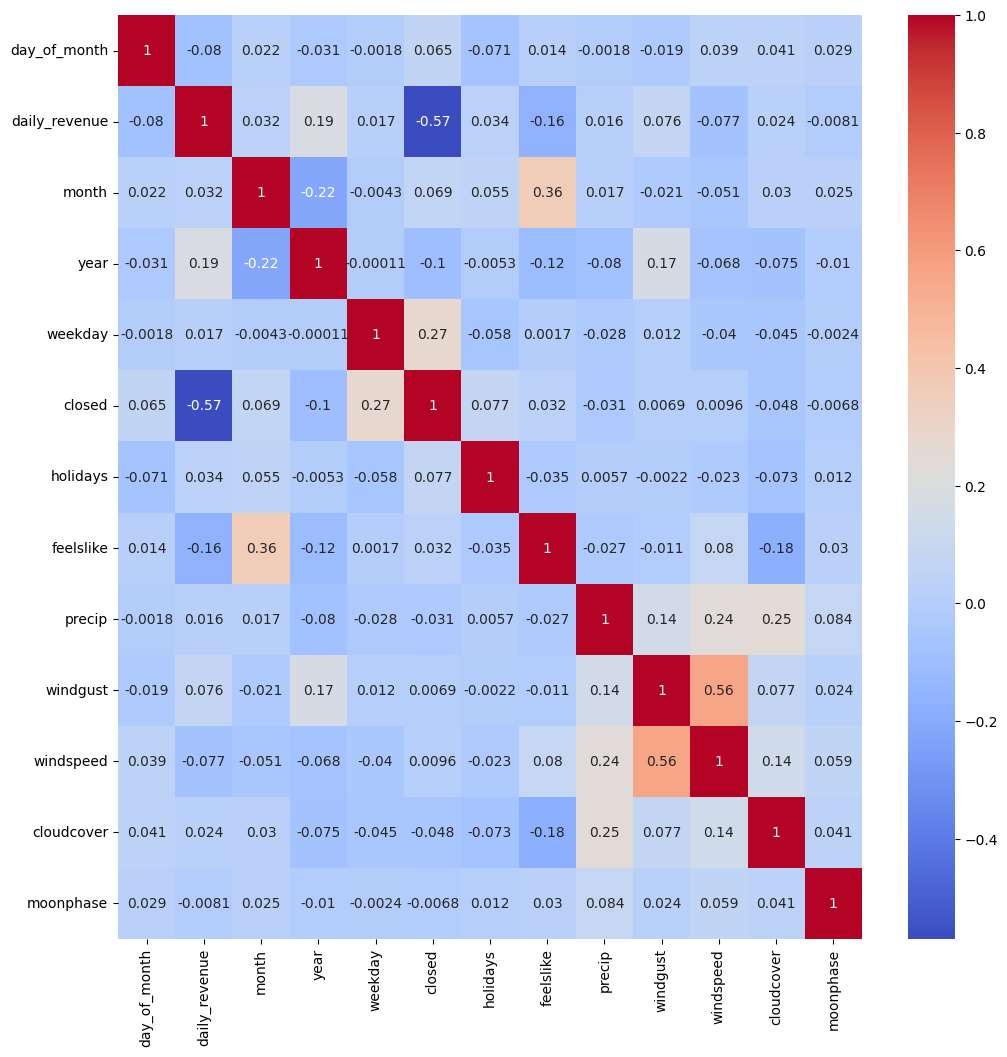

In [34]:
# create a correlation matrix
corr_matrix = la_lluna.corr()

# plot the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()


In [30]:
la_lluna['date'] = pd.to_datetime(la_lluna['year'].astype(str) + '-' + la_lluna['month'].astype(str).str.zfill(2) + '-' + la_lluna['day_of_month'].astype(str).str.zfill(2))
la_lluna['date'] = la_lluna['date'].dt.strftime('%d-%m-%Y')


In [31]:
la_lluna.sample()

,day_of_month,daily_revenue,month,year,date,weekday_str,weekday,closed,holidays,feelslike,precip,windgust,windspeed,cloudcover,moonphase
414,15,2033.61,5,2021,15-05-2021,Saturday,6,0,0,17.2,0.0,39.9,29.7,31.8,0.12


In [33]:
la_lluna.to_csv("la_lluna.csv", index=False)

In [39]:
la_lluna['date'] = pd.to_datetime(la_lluna['date'], format='%d-%m-%Y')


In [46]:
la_lluna.dtypes

day_of_month              int64
daily_revenue           float64
month                     int64
year                      int64
date             datetime64[ns]
weekday_str            category
weekday                   int64
closed                    int64
holidays                  int64
feelslike               float64
precip                  float64
windgust                float64
windspeed               float64
cloudcover              float64
moonphase               float64
dtype: object

C:\Users\germa\AppData\Local\Temp\ipykernel_11428\2140827497.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = la_lluna.corr()


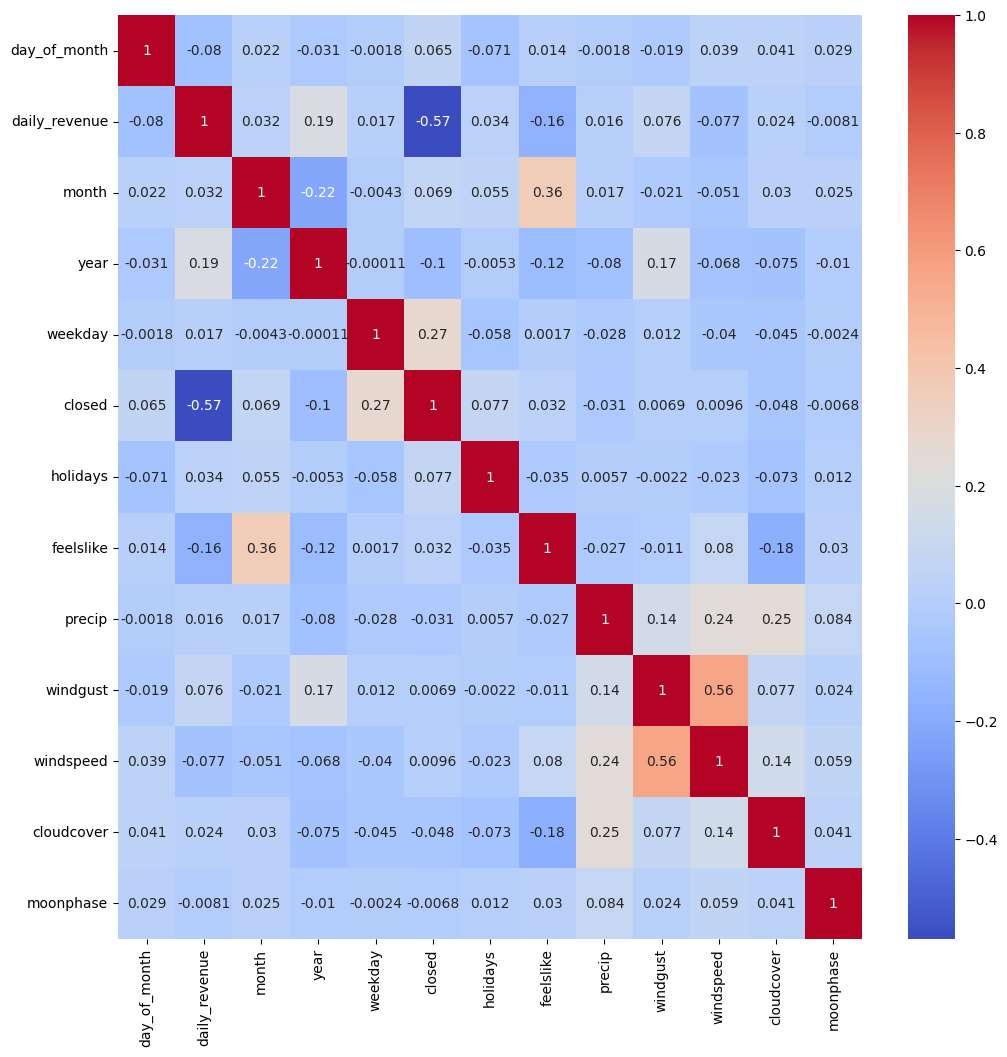

In [45]:
# convert 'date' column to datetime object
la_lluna['date'] = pd.to_datetime(la_lluna['date'], format='%d-%m-%Y')

# calculate correlation matrix
corr = la_lluna.corr()

# plot the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
plt.show()


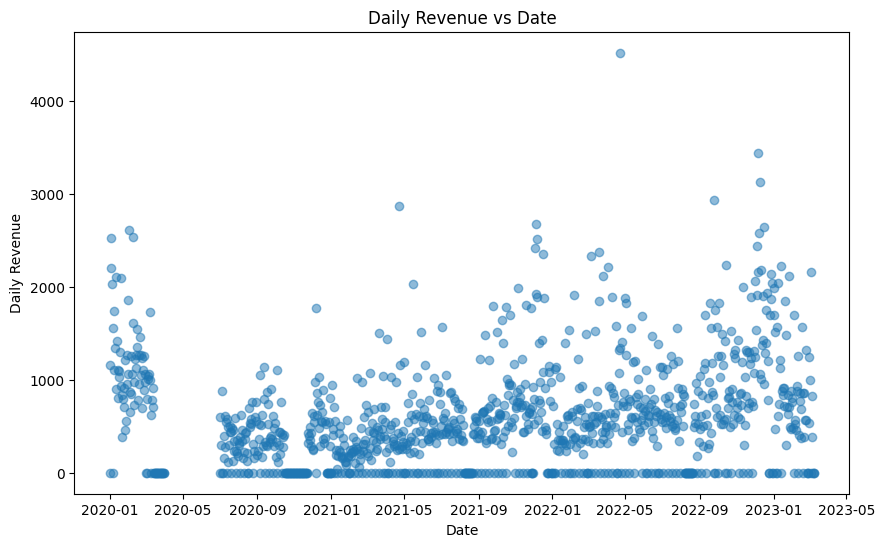

In [47]:


# create a figure and axis objects
fig, ax = plt.subplots(figsize=(10,6))

# scatter plot of daily_revenue against date
ax.scatter(la_lluna['date'], la_lluna['daily_revenue'], alpha=0.5)

# set x-axis label
ax.set_xlabel('Date')

# set y-axis label
ax.set_ylabel('Daily Revenue')

# set title
ax.set_title('Daily Revenue vs Date')

# display the plot
plt.show()


In [50]:
correlation_matrix = la_lluna.corr()
print(correlation_matrix['daily_revenue'])

day_of_month    -0.080237
daily_revenue    1.000000
month            0.031644
year             0.190365
weekday          0.017087
closed          -0.570197
holidays         0.033915
feelslike       -0.161716
precip           0.015912
windgust         0.076199
windspeed       -0.076606
cloudcover       0.023644
moonphase       -0.008075
date_numeric     0.202343
Name: daily_revenue, dtype: float64


C:\Users\germa\AppData\Local\Temp\ipykernel_11428\3500366830.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = la_lluna.corr()


In [49]:
la_lluna['date_numeric'] = pd.to_numeric(la_lluna['date'])

In [52]:
# Create a list of features to keep
relevant_features = ['year', 'closed', 'feelslike', 'date_numeric', 'daily_revenue']

# Create a new dataframe with only the relevant features
df_relevant = la_lluna[relevant_features]

# Display the first few rows of the new dataframe
print(df_relevant.head())


   year  closed  feelslike         date_numeric  daily_revenue
0  2020       0        7.3  1577836800000000000        1153.09
1  2020       1        7.1  1577923200000000000           0.00
2  2020       0        8.2  1578009600000000000        2205.11
3  2020       0        7.2  1578096000000000000        2525.07
4  2020       0        7.9  1578182400000000000        2030.62


In [87]:
print(la_lluna_scaled.columns)

Index(['day_of_month', 'daily_revenue', 'month', 'year', 'weekday', 'closed',
       'holidays', 'feelslike', 'precip', 'windgust', 'windspeed',
       'cloudcover', 'moonphase', 'date_numeric'],
      dtype='object')


In [99]:
la_lluna_scaled = la_lluna



In [100]:
la_lluna_scaled.sample()

,day_of_month,daily_revenue,month,year,weekday,closed,holidays,feelslike,precip,windgust,windspeed,cloudcover,moonphase,date_numeric
798,26.0,701.76,5.0,2022.0,4.0,0.0,0.0,21.0,0.0,40.7,18.9,15.4,0.86,1.653523e+18


In [101]:
la_lluna_scaled

,day_of_month,daily_revenue,month,year,weekday,closed,holidays,feelslike,precip,windgust,windspeed,cloudcover,moonphase,date_numeric
0,1.0,1153.09,1.0,2020.0,3.0,0.0,1.0,7.3,0.0,14.6,16.3,27.2,0.20,1.577837e+18
1,2.0,0.00,1.0,2020.0,4.0,1.0,0.0,7.1,0.0,44.6,15.2,49.4,0.23,1.577923e+18
2,3.0,2205.11,1.0,2020.0,5.0,0.0,0.0,8.2,0.0,48.2,22.8,53.3,0.25,1.578010e+18
3,4.0,2525.07,1.0,2020.0,6.0,0.0,0.0,7.2,0.0,40.7,16.6,12.7,0.30,1.578096e+18
4,5.0,2030.62,1.0,2020.0,7.0,0.0,0.0,7.9,0.0,46.4,16.7,3.1,0.33,1.578182e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,5.0,380.86,3.0,2023.0,7.0,0.0,0.0,7.3,0.0,46.1,27.0,7.1,0.43,1.677974e+18
1082,6.0,826.40,3.0,2023.0,1.0,0.0,0.0,8.6,0.0,29.5,17.6,42.5,0.46,1.678061e+18
1083,7.0,0.00,3.0,2023.0,2.0,1.0,0.0,10.4,0.0,48.2,28.0,30.8,0.50,1.678147e+18
1084,8.0,0.00,3.0,2023.0,3.0,1.0,0.0,15.4,0.0,53.3,36.0,40.7,0.53,1.678234e+18


In [102]:
la_lluna_scaled.dtypes

day_of_month     float64
daily_revenue    float64
month            float64
year             float64
weekday          float64
closed           float64
holidays         float64
feelslike        float64
precip           float64
windgust         float64
windspeed        float64
cloudcover       float64
moonphase        float64
date_numeric     float64
dtype: object

In [89]:
la_lluna_scaled[['day_of_month', 'daily_revenue', 'month', 'year', 'weekday', 'closed',
       'holidays', 'feelslike', 'precip', 'windgust', 'windspeed',
       'cloudcover', 'moonphase', 'date_numeric']] = la_lluna_scaled[['day_of_month', 'daily_revenue', 'month', 'year', 'weekday', 'closed',
       'holidays', 'feelslike', 'precip', 'windgust', 'windspeed',
       'cloudcover', 'moonphase', 'date_numeric']].astype(float)

In [103]:

# Initialize the standard scaler
scaler = StandardScaler()

# Standardize the relevant features
la_lluna_scaled2 = scaler.fit_transform(la_lluna_scaled)

# Convert the scaled features array back into a dataframe
la_lluna_scaled2 = pd.DataFrame(la_lluna_scaled2, columns=la_lluna_scaled.columns)

# Display the first few rows of the scaled dataframe
print(la_lluna_scaled2.head())

   day_of_month  daily_revenue    month      year   weekday    closed  \
0     -1.662915       0.947094 -1.45626 -1.350254 -0.500636 -0.539923   
1     -1.549943      -1.056069 -1.45626 -1.350254 -0.000463  1.852114   
2     -1.436971       2.774678 -1.45626 -1.350254  0.499711 -0.539923   
3     -1.323999       3.330517 -1.45626 -1.350254  0.999884 -0.539923   
4     -1.211027       2.471551 -1.45626 -1.350254  1.500058 -0.539923   

   holidays  feelslike    precip  windgust  windspeed  cloudcover  moonphase  \
0  5.239024  -1.309227 -0.217086 -1.229129  -0.857572   -0.503876  -0.982098   
1 -0.190875  -1.337675 -0.217086  0.654645  -1.008532    0.654029  -0.877797   
2 -0.190875  -1.181210 -0.217086  0.880698   0.034468    0.857444  -0.808263   
3 -0.190875  -1.323451 -0.217086  0.409754  -0.816401   -1.260165  -0.634427   
4 -0.190875  -1.223882 -0.217086  0.767671  -0.802677   -1.760881  -0.530126   

   date_numeric  
0     -1.924590  
1     -1.921479  
2     -1.918369  
3     -1

In [104]:
la_lluna_scaled2.to_csv("la_lluna_scaled2.csv",index=False)

In [54]:


# Initialize the standard scaler
scaler = StandardScaler()

# Standardize the relevant features
df_relevant_scaled = scaler.fit_transform(df_relevant)

# Convert the scaled features array back into a dataframe
df_relevant_scaled = pd.DataFrame(df_relevant_scaled, columns=df_relevant.columns)

# Display the first few rows of the scaled dataframe
print(df_relevant_scaled.head())


       year    closed  feelslike  date_numeric  daily_revenue
0 -1.350254 -0.539923  -1.309227     -1.924590       0.947094
1 -1.350254  1.852114  -1.337675     -1.921479      -1.056069
2 -1.350254 -0.539923  -1.181210     -1.918369       2.774678
3 -1.350254 -0.539923  -1.323451     -1.915259       3.330517
4 -1.350254 -0.539923  -1.223882     -1.912149       2.471551


In [56]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_relevant.drop('daily_revenue', axis=1), df_relevant['daily_revenue'], test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 864
Testing set size: 217


In [58]:


# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean squared error: ", mse)


Mean squared error:  380368.2536550204


In [79]:
df_relevant.sample(5)

,year,closed,feelslike,date_numeric,daily_revenue
971,2022,0,17.8,1668556800000000000,823.56
208,2020,1,14.4,1603756800000000000,0.00
957,2022,0,17.7,1667347200000000000,691.50
313,2021,0,14.2,1612569600000000000,380.74
588,2021,0,10.9,1636070400000000000,1988.22


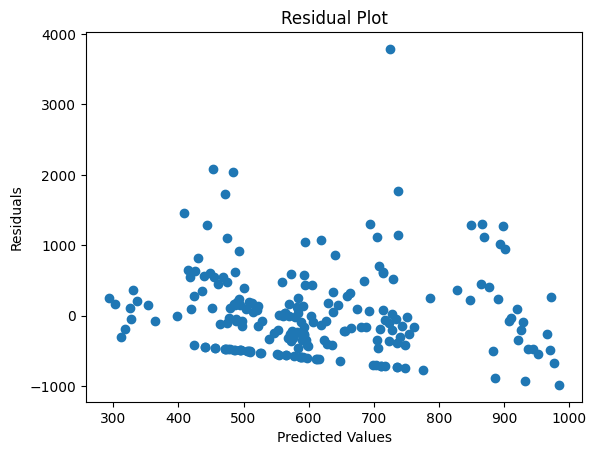

In [59]:


# Calculate the residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [70]:
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(y_train, model.predict(X_train))
print("P-value:", p_value)

P-value: 0.91494173157316


In [71]:
la_lluna.dtypes

day_of_month              int64
daily_revenue           float64
month                     int64
year                      int64
date             datetime64[ns]
weekday_str            category
weekday                   int64
closed                    int64
holidays                  int64
feelslike               float64
precip                  float64
windgust                float64
windspeed               float64
cloudcover              float64
moonphase               float64
date_numeric              int64
dtype: object

In [75]:
la_lluna.sample()

,day_of_month,daily_revenue,month,year,date,weekday_str,weekday,closed,holidays,feelslike,precip,windgust,windspeed,cloudcover,moonphase,date_numeric
715,4,498.26,3,2022,2022-03-04,Friday,5,0,0,11.6,0.01,29.2,18.9,30.5,0.06,1646352000000000000


In [73]:
la_lluna.shape

(1081, 16)

In [74]:
la_lluna.isna().sum()

day_of_month     0
daily_revenue    0
month            0
year             0
date             0
weekday_str      0
weekday          0
closed           0
holidays         0
feelslike        0
precip           0
windgust         0
windspeed        0
cloudcover       0
moonphase        0
date_numeric     0
dtype: int64

In [78]:
la_lluna.to_csv("la_lluna.csv", index=False)